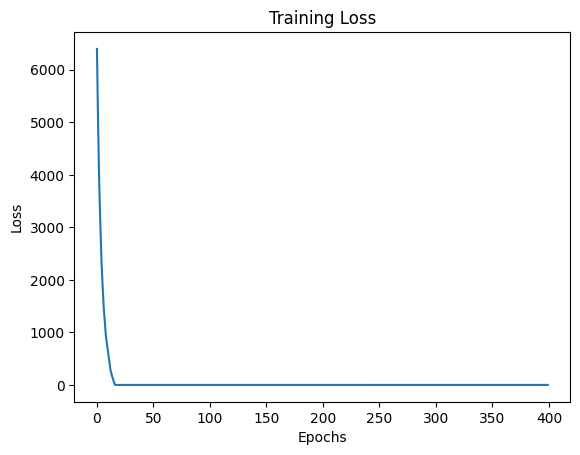

Neural Network Model Summary:
FullyConnected(
  (l1): Linear(in_features=7, out_features=64, bias=True)
  (act1): ReLU()
  (l2): Linear(in_features=64, out_features=16, bias=True)
  (drop): Dropout(p=0.2, inplace=False)
  (act2): ReLU()
  (l3): Linear(in_features=16, out_features=9, bias=True)
)
Accuracy: 0.34177215189873417
Confusion Matrix:
 [[54 17 17 17  7 24  2 13  7]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]


In [4]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv('Dataset.csv')

target_col = 'Profession'
df = df.dropna(subset=[target_col])

label_encoders = {}
categorical_cols = ['Gender', target_col] 

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

X = df.drop(columns=[target_col]).values
y = df[target_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

X_tr_tensor = torch.tensor(X_train, dtype=torch.float32)
y_tr_tensor = torch.tensor(y_train, dtype=torch.long)
X_ts_tensor = torch.tensor(X_test, dtype=torch.float32)

class FullyConnected(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.l1 = nn.Linear(input_size, 64)
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(64, 16)
        self.drop = nn.Dropout(0.2)
        self.act2 = nn.ReLU()
        self.l3 = nn.Linear(16, output_size)

    def forward(self, x):
        x = self.l1(x)
        x = self.act1(x)
        x = self.l2(x)
        x = self.drop(x)
        x = self.act2(x)
        x = self.l3(x)
        return x

# Train the model
def fit(model):
    epochs = 400
    loss_arr = []
    loss_fn = nn.CrossEntropyLoss()
    optim = torch.optim.Adam(model.parameters(), lr=0.002)

    for epoch in range(epochs):
        y_pred = model(X_tr_tensor)
        loss = loss_fn(y_pred, y_tr_tensor)
        loss_arr.append(loss.item())

        loss.backward()
        optim.step()
        optim.zero_grad()

    plt.plot(loss_arr)
    plt.title("Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

# Initialize and train the model
input_size = X.shape[1] 
output_size = len(np.unique(y)) 
model = FullyConnected(input_size, output_size)

fit(model)

# Make predictions
ytest_pred = model(X_ts_tensor)
newytest = torch.argmax(ytest_pred, dim=1)

# Evaluate the model
print('Neural Network Model Summary:')
print(model)

print("Accuracy:", accuracy_score(newytest.cpu(), y_test))
print("Confusion Matrix:\n", confusion_matrix(newytest.cpu(), y_test))
